Program Name: Jetstarterprogram.py

Date: 6/11/2022

Creator: Sol Samuels

Description: 
 - This program is a method tester program for the program Jet_Length_Width_Determiner_v1.py
 - Not streamlined as intended.


In [1]:
import astropy.io
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

from astropy.io import fits

In [2]:
path = '**/Group*0.00_1.00_0.00*.fits*'
print(glob.glob(path, recursive=True))
for file in glob.glob(path, recursive=True):
    print(file)


['Group_L446_rc30_beta07_0010_nu=30.0_los=0.00_1.00_0.00_1.0Myr.fits', 'Group_L446_rc30_beta07_0040_nu=30.0_los=0.00_1.00_0.00_4.0Myr.fits.gz', 'Group0.00_1.00_0.00.fits.txt']
Group_L446_rc30_beta07_0010_nu=30.0_los=0.00_1.00_0.00_1.0Myr.fits
Group_L446_rc30_beta07_0040_nu=30.0_los=0.00_1.00_0.00_4.0Myr.fits.gz
Group0.00_1.00_0.00.fits.txt


In [3]:
#Opens and displays list of FITS file Extension HDUs

fits_image_hdul = fits.open('Group_L446_rc30_beta07_0040_nu=30.0_los=0.00_1.00_0.00_4.0Myr.fits.gz')
fits_image_hdul.info()

Filename: Group_L446_rc30_beta07_0040_nu=30.0_los=0.00_1.00_0.00_4.0Myr.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  I             1 PrimaryHDU      25   (144, 144)   float64   
  1  Q             1 ImageHDU        26   (144, 144)   float64   
  2  U             1 ImageHDU        26   (144, 144)   float64   


In [4]:
#Displays FITS Image title, time index, and pixel size

sim_title = fits_image_hdul[0].header['OBJECT']
sim_time = fits_image_hdul[0].header['TIME']
pixel = fits_image_hdul[0].header['CDELT1']

print(sim_title)
print("Time index: {}".format(sim_time))
print("Pixel size: {}".format(pixel))

Simulation Group_L446_rc30_beta07 - 4.0 Myr - 30 MHz
Time index: 4.0003e+00 Myr
Pixel size: 1.2500e+21 cm


In [5]:
#Displays Entire FITS Image Header

hdr = fits_image_hdul[0].header
header = repr(hdr)
print(header)


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  144                                                  
NAXIS2  =                  144                                                  
EXTEND  =                    T                                                  
EXTNAME = 'I       '           / extension name                                 
BTYPE   = 'I       '                                                            
BUNIT   = 'Jy/arcsec**2'                                                        
WCSAXES =                    2                                                  
CRPIX1  = '72.5    '                                                            
CRPIX2  = '72.5    '                                                            
CDELT1  = '1.2500e+21 cm'   

In [6]:
#Difines Data From FITS image and records image dimensions

data =  fits_image_hdul[0].data
print(data)

length = len(data[0])
print(length)

width = len(data)
print(width)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
144
144


## DETERMINING LENGTH

In [7]:
#Creates list of slice sums

slice_vals = []

for row in data:
    slice_sum = 0
    for element in row:
        slice_sum += element
    slice_vals.append(slice_sum)
    
print(slice_vals)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.484852240641784e-07, 0.0034607825436592777, 0.5561388701933379, 23.945903334750223, 49.356954981519266, 62.98149672974704, 49.992472582279255, 48.34111887474366, 56.11663004757334, 59.007587811555425, 58.61302747102203, 56.74961794155173, 54.80831947018898, 55.11299285245062, 58.88709929268556, 61.72508963953176, 62.392740440947115, 63.11110512724148, 62.94328308827415, 63.692177894083564, 63.82655096452979, 61.722394790290934, 60.232868705791994, 64.21631409673776, 69.08828142695481, 74.50868109073996, 74.9097388435797, 67.39606716529872, 64.68123111380629, 64.86086171307352, 72.64120097837666, 77.66326924146908, 80.12815609688879, 84.13660146570835, 85.07630862951508, 80.32948396436767, 81.05153965529381, 77.70821576720232, 77.96614851459091, 77.19182885478483, 80.32757355898141, 82.92971273749399, 80.74899097947953, 75.0604142734249

In [8]:
#Creates list of Cumultive Sum values

cul_vals = []
movingsum = 0

for element in slice_vals:
    movingsum += element
    cul_vals.append(movingsum)
    
print(cul_vals)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.484852240641784e-07, 0.003461631028883342, 0.5596005012222212, 24.505503835972444, 73.86245881749171, 136.84395554723875, 186.836428129518, 235.17754700426167, 291.294177051835, 350.3017648633904, 408.9147923344124, 465.66441027596414, 520.4727297461532, 575.5857225986038, 634.4728218912893, 696.1979115308211, 758.5906519717682, 821.7017570990097, 884.6450401872838, 948.3372180813674, 1012.1637690458972, 1073.8861638361882, 1134.1190325419802, 1198.335346638718, 1267.4236280656728, 1341.9323091564127, 1416.8420479999922, 1484.238115165291, 1548.9193462790972, 1613.7802079921707, 1686.4214089705474, 1764.0846782120166, 1844.2128343089053, 1928.3494357746135, 2013.4257444041286, 2093.7552283684963, 2174.80676802379, 2252.514983790992, 2330.481132305583, 2407.672961160368, 2488.000534719349, 2570.930247456843, 2651.6792384363225, 2726.739

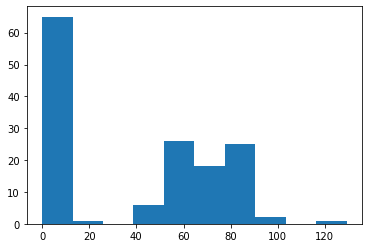

In [9]:
plt.hist(slice_vals)
plt.show()

In [10]:
y_val = []
for x in range(length):
    y_val.append(x)
    
print(len(y_val))

144


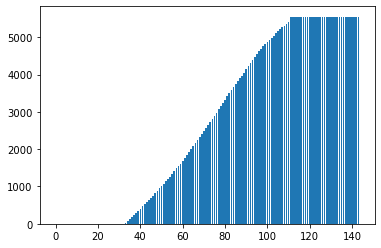

In [11]:
plt.bar(y_val, cul_vals)
plt.show()

In [12]:
max_val = cul_vals[-1]
norm_cul_vals = []
norm = 0

for element in cul_vals:
    norm = element / max_val
    norm_cul_vals.append(norm)
    
print(norm_cul_vals)
    

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5283334152508788e-10, 6.235260464961877e-07, 0.00010079800106741403, 0.004414052161177341, 0.01330447021842609, 0.02464900790330457, 0.03365389852385491, 0.04236133917355766, 0.05246934322838027, 0.06309808084784992, 0.07365574831363066, 0.0838777692684981, 0.09375011397225211, 0.10367733794763531, 0.11428437258108702, 0.12540260002688597, 0.13664108802650277, 0.14800897141489733, 0.15934662587028342, 0.17081917495008547, 0.18231592796978516, 0.19343367000605347, 0.20428311126073323, 0.21585007033730835, 0.228294592187825, 0.24171546314793446, 0.25520857460766916, 0.26734828648289066, 0.27899898870458517, 0.2906820468753847, 0.3037665381111225, 0.31775562904081733, 0.33218870754261226, 0.34734380698556516, 0.3626681711155467, 0.3771375137853628, 0.3917369166859073, 0.4057341036054001, 0.41977775064294104, 0.43368192340602163, 0.4481509

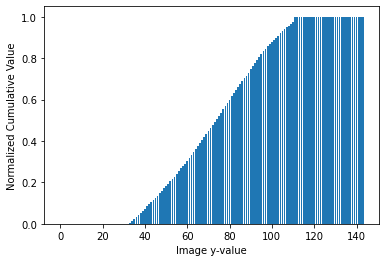

In [13]:
plt.bar(y_val, norm_cul_vals)
plt.xlabel("Image y-value")
plt.ylabel("Normalized Cumulative Value")
plt.show()

In [14]:
norm_cul_vals_edit = []
prev_ele = 0

for element in norm_cul_vals:
    if element != 0 and element != prev_ele:
        norm_cul_vals_edit.append(element)
    prev_ele = element
        
print(norm_cul_vals_edit)

y_vals = []
for x in range(len(norm_cul_vals_edit)):
    y_vals.append(x)

[1.5283334152508788e-10, 6.235260464961877e-07, 0.00010079800106741403, 0.004414052161177341, 0.01330447021842609, 0.02464900790330457, 0.03365389852385491, 0.04236133917355766, 0.05246934322838027, 0.06309808084784992, 0.07365574831363066, 0.0838777692684981, 0.09375011397225211, 0.10367733794763531, 0.11428437258108702, 0.12540260002688597, 0.13664108802650277, 0.14800897141489733, 0.15934662587028342, 0.17081917495008547, 0.18231592796978516, 0.19343367000605347, 0.20428311126073323, 0.21585007033730835, 0.228294592187825, 0.24171546314793446, 0.25520857460766916, 0.26734828648289066, 0.27899898870458517, 0.2906820468753847, 0.3037665381111225, 0.31775562904081733, 0.33218870754261226, 0.34734380698556516, 0.3626681711155467, 0.3771375137853628, 0.3917369166859073, 0.4057341036054001, 0.41977775064294104, 0.43368192340602163, 0.44815092196420137, 0.4630886306595601, 0.47763353700107525, 0.49115378886205197, 0.5047252577458131, 0.5192297974512807, 0.5351866043917313, 0.55198716564518

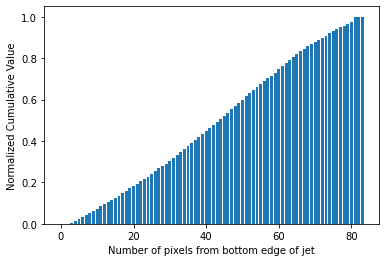

In [15]:
plt.bar(y_vals, norm_cul_vals_edit)
plt.xlabel("Number of pixels from bottom edge of jet")
plt.ylabel("Normalized Cumulative Value")
plt.show()

In [16]:
pixel_count = 0
for element in norm_cul_vals_edit:
    if element <= 0.98:
        pixel_count += 1
        
print("Length of Jet in Pixels: {} pixels".format(pixel_count))

Length of Jet in Pixels: 81 pixels


In [17]:

pixel_size = float(pixel[:-3])

jet_size_y = pixel_size * pixel_count
print("Jet Length (in y direction): {} cm".format(jet_size_y))


Jet Length (in y direction): 1.0125e+23 cm


## DETERMINING WIDTH

In [18]:
data_reorient = []

for x in range(width):
    col_sub = []
    for row in data:
        col_sub.append(row[x])
    data_reorient.append(col_sub)
    
    

In [19]:
col_slice_vals = []

for row in data_reorient:
    slice_sum = 0
    for element in row:
        slice_sum += element
    col_slice_vals.append(slice_sum)
    
print(col_slice_vals)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2194154211652402e-11, 4.8771579665733456e-08, 8.397177527086027e-06, 0.0024218392630000647, 0.19106885403181445, 3.722326752026957, 11.015793273335849, 21.287501959859892, 31.855676573233865, 52.38210012874596, 73.09815840769978, 83.71613693790555, 97.28349354443647, 148.0656463534946, 179.4896849535506, 213.73571906598784, 327.8759395169138, 365.46524612048205, 364.2395635169561, 393.2601439838604, 400.4548142923657, 387.74253464996724, 362.44913901049983, 317.6358171153991, 269.28185425230413, 260.3505321238799, 241.82482845503557, 217.5627822302546, 194.77782081333874, 172.9511757437756, 151.4618861579566, 101.64782170964632, 52.040733103369966, 29.351858583848326, 14.974725836723332, 7.673852571836566, 2.682324992625822, 0.15030

In [20]:
col_cul_vals = []
movingsum = 0

for element in col_slice_vals:
    movingsum += element
    col_cul_vals.append(movingsum)
    
print(col_cul_vals)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2194154211652402e-11, 4.878377381994511e-08, 8.445961300905971e-06, 0.0024302852243009705, 0.19349913925611542, 3.9158258912830726, 14.93161916461892, 36.21912112447881, 68.07479769771268, 120.45689782645864, 193.55505623415843, 277.271193172064, 374.55468671650044, 522.620333069995, 702.1100180235456, 915.8457370895335, 1243.7216766064473, 1609.1869227269294, 1973.4264862438854, 2366.686630227746, 2767.1414445201117, 3154.883979170079, 3517.333118180579, 3834.968935295978, 4104.250789548282, 4364.601321672162, 4606.426150127198, 4823.9889323574525, 5018.766753170791, 5191.717928914567, 5343.1798150725235, 5444.82763678217, 5496.86836988554, 5526.2202284693885, 5541.194954306112, 5548.868806877948, 5551.551131870574, 5551.7014396742

In [21]:
max_val = col_cul_vals[-1]
norm_cul_vals = []
norm = 0

for element in col_cul_vals:
    norm = element / max_val
    norm_cul_vals.append(norm)
    
print(norm_cul_vals)
    

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1964711728416546e-15, 8.787173840687135e-12, 1.5213281874563335e-09, 4.3775495571961843e-07, 3.48540188986291e-05, 0.0007053378642572329, 0.002689556855660858, 0.006523966654411999, 0.012261968164809, 0.02169729027970824, 0.03486409094038059, 0.04994345423972801, 0.06746663669706439, 0.09413695087046106, 0.12646751779458407, 0.1649666492133435, 0.22402527984219844, 0.28985468168886763, 0.3554633075424691, 0.4262992634189905, 0.49843115878064914, 0.5682732556625617, 0.6335593814274056, 0.690773510726287, 0.7392778858529637, 0.7861735072071403, 0.8297321874861956, 0.8689206683892288, 0.9040050097137463, 0.9351578281246591, 0.9624398897548354, 0.9807491965170904, 0.9901230299204659, 0.9954100313909854, 0.9981073528329382, 0.99948960498

In [22]:
norm_cul_vals_edit = []
prev_ele = 0

for element in norm_cul_vals:
    if element != 0 and element != prev_ele:
        norm_cul_vals_edit.append(element)
    prev_ele = element
        
print(norm_cul_vals_edit)

x_vals = []
for y in range(len(norm_cul_vals_edit)):
    x_vals.append(y)
    
print(x_vals)

[2.1964711728416546e-15, 8.787173840687135e-12, 1.5213281874563335e-09, 4.3775495571961843e-07, 3.48540188986291e-05, 0.0007053378642572329, 0.002689556855660858, 0.006523966654411999, 0.012261968164809, 0.02169729027970824, 0.03486409094038059, 0.04994345423972801, 0.06746663669706439, 0.09413695087046106, 0.12646751779458407, 0.1649666492133435, 0.22402527984219844, 0.28985468168886763, 0.3554633075424691, 0.4262992634189905, 0.49843115878064914, 0.5682732556625617, 0.6335593814274056, 0.690773510726287, 0.7392778858529637, 0.7861735072071403, 0.8297321874861956, 0.8689206683892288, 0.9040050097137463, 0.9351578281246591, 0.9624398897548354, 0.9807491965170904, 0.9901230299204659, 0.9954100313909854, 0.9981073528329382, 0.9994896049896781, 0.999972758591005, 0.9999998327736159, 0.9999999998553306, 0.999999999999952, 1.0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


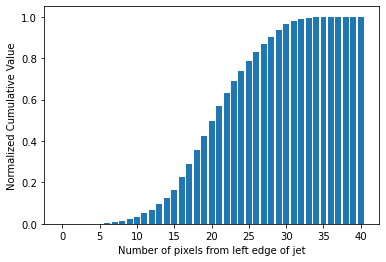

In [23]:
plt.bar(x_vals, norm_cul_vals_edit)
plt.xlabel("Number of pixels from left edge of jet")
plt.ylabel("Normalized Cumulative Value")
plt.show()

In [24]:
pixel_count = 0
for element in norm_cul_vals_edit:
    if element <= 0.98:
        pixel_count += 1
        
print("Width of Jet in Pixels: {} pixels".format(pixel_count))

pixel_size = float(pixel[:-3])

jet_size_y = pixel_size * pixel_count
print("Jet Width (in x direction): {} cm".format(jet_size_y))


Width of Jet in Pixels: 31 pixels
Jet Width (in x direction): 3.875e+22 cm
